# FACS analysis: hek293t aavs1 crispr time course (3h,6h,25h,30h,48h,72h)
* plasmid reporters 1)YFP-WT: Flag-YFPwt-DHFRwt or 2) YFP-CGG: Flag-YFPcgg-DHFRcgg @ aavs1 locus, puroR.
* rich, no serum, -leu, -arg

## Analysis 1 : consider mean of fcs/ssc gated population of 20000 events @ 25h

1) thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding, 
2) plus "no tmp" subtraction,
3) plus rich condition normalization ## 

In [2]:
%pylab inline
import matplotlib.pyplot as plt
from FlowCytometryTools import FCMeasurement
import pandas
import numpy
from IPython.core.display import HTML
from matplotlib.ticker import MaxNLocator, LogLocator, AutoMinorLocator # custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','yellow','olive',
                                          'orange', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['pdf.compression'] = 0
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [3]:
sampleids = {1: 'YFP-WT Rich TMP 1',
 2: 'YFP-WT -Serum TMP 1',
 3: 'YFP-WT -Leu TMP 1',
 4: 'YFP-WT -Arg TMP 1',
 5: 'YFP-CGG Rich TMP 1',
 6: 'YFP-CGG -Serum TMP 1',
 7: 'YFP-CGG -Leu TMP 1',
 8: 'YFP-CGG -Arg TMP 1',
 9: 'YFP-WT Rich NOTMP 1',
 10: 'YFP-WT -Serum NOTMP 1',
 11: 'YFP-WT -Leu NOTMP 1',
 12: 'YFP-WT -Arg NOTMP 1',
 13: 'YFP-CGG Rich NOTMP 1',
 14: 'YFP-CGG -Serum NOTMP 1',
 15: 'YFP-CGG -Leu NOTMP 1',
 16: 'YFP-CGG -Arg NOTMP 1'}

#make sure this is right!

#Specimen_001: 3h
#Specimen_002: 6h
#Specimen_003: 25h
#Specimen_004: 30h
#Specimen_005: 48h
#Specimen_006: 72h

In [4]:
fcsFiles = !ls ../fcs_files/Specimen_003*.fcs

processeddata = dict()
for File in fcsFiles:
    print File
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    fsc_threshold = 25000
    ssc_threshold = 12500
    processeddata[ sampleid ] = dict()
    subset = numpy.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)        

../fcs_files/Specimen_003_Tube_001.fcs
../fcs_files/Specimen_003_Tube_002.fcs
../fcs_files/Specimen_003_Tube_003.fcs
../fcs_files/Specimen_003_Tube_004.fcs
../fcs_files/Specimen_003_Tube_005.fcs
../fcs_files/Specimen_003_Tube_006.fcs
../fcs_files/Specimen_003_Tube_007.fcs
../fcs_files/Specimen_003_Tube_008.fcs
../fcs_files/Specimen_003_Tube_009.fcs
../fcs_files/Specimen_003_Tube_010.fcs
../fcs_files/Specimen_003_Tube_011.fcs
../fcs_files/Specimen_003_Tube_012.fcs
../fcs_files/Specimen_003_Tube_013.fcs
../fcs_files/Specimen_003_Tube_014.fcs
../fcs_files/Specimen_003_Tube_015.fcs
../fcs_files/Specimen_003_Tube_016.fcs


In [5]:
data = pandas.DataFrame.from_dict( processeddata, orient='index' )
print data

                             fsc_q75  fitc_median    fitc_q25       fsc_q25  \
YFP-CGG -Arg NOTMP 1    75766.382812    17.200001    2.580000  51763.742188   
YFP-CGG -Arg TMP 1      79403.484375   414.520020  199.520004  57178.320312   
YFP-CGG -Leu NOTMP 1    75563.066406    18.920000    4.300000  51817.391602   
YFP-CGG -Leu TMP 1      75644.283203   454.940002  233.059998  53233.936523   
YFP-CGG -Serum NOTMP 1  91656.398438    22.360001    5.160000  65382.699219   
YFP-CGG -Serum TMP 1    92656.140625   356.899994  174.580002  65904.769531   
YFP-CGG Rich NOTMP 1    90128.115234    31.820000   12.040000  57508.545898   
YFP-CGG Rich TMP 1      89691.703125   540.940002  289.820007  61969.820312   
YFP-WT -Arg NOTMP 1     77558.664062    18.059999    2.580000  55884.062500   
YFP-WT -Arg TMP 1       81006.320312   479.020020  237.360001  58342.339844   
YFP-WT -Leu NOTMP 1     72012.363281    25.800001    7.740000  50702.582031   
YFP-WT -Leu TMP 1       73328.453125   721.540039  3

In [6]:
data['samplelabel'] = data.index
data['samplelabel'] = map( lambda x: ' '.join(x.split(' ')[:-1]), data['samplelabel'])
groupeddata = data.groupby( ['samplelabel'] )
#can only run this once!

In [7]:
HTML(data.to_html())

,fsc_q75,fitc_median,fitc_q25,fsc_q25,fitc_mean,fitc_q75,fsc_median,samplelabel
YFP-CGG -Arg NOTMP,75766.382812,17.200001,2.580000,51763.742188,23.814508,35.260002,63974.480469,YFP-CGG -Arg NOTMP
YFP-CGG -Arg TMP,79403.484375,414.520020,199.520004,57178.320312,658.861816,796.359985,67197.921875,YFP-CGG -Arg TMP
YFP-CGG -Leu NOTMP,75563.066406,18.920000,4.300000,51817.391602,27.438068,37.840000,62412.343750,YFP-CGG -Leu NOTMP
YFP-CGG -Leu TMP,75644.283203,454.940002,233.059998,53233.936523,691.226501,833.340027,63571.179688,YFP-CGG -Leu TMP
YFP-CGG -Serum NOTMP,91656.398438,22.360001,5.160000,65382.699219,30.745790,42.139999,77856.140625,YFP-CGG -Serum NOTMP
YFP-CGG -Serum TMP,92656.140625,356.899994,174.580002,65904.769531,548.209473,686.710022,78206.164062,YFP-CGG -Serum TMP
YFP-CGG Rich NOTMP,90128.115234,31.820000,12.040000,57508.545898,47.016197,60.200001,72231.031250,YFP-CGG Rich NOTMP
YFP-CGG Rich TMP,89691.703125,540.940002,289.820007,61969.820312,754.282104,951.160034,74559.437500,YFP-CGG Rich TMP
YFP-WT -Arg NOTMP,77558.664062,18.059999,2.580000,55884.062500,25.750933,35.260002,66029.460938,YFP-WT -Arg NOTMP
YFP-WT -Arg TMP,81006.320312,479.020020,237.360001,58342.339844,774.740845,910.739990,68515.859375,YFP-WT -Arg TMP


In [8]:
summarizedData = groupeddata['fitc_mean'].agg([numpy.mean, numpy.std]) #take mean of 3 population means
medianSummarizedData = groupeddata['fitc_median'].agg([numpy.mean, numpy.std]) #take mean of 3 population medians

In [9]:
summarizedData

,mean,std
samplelabel,,
YFP-CGG -Arg NOTMP,23.814508,NaN
YFP-CGG -Arg TMP,658.861816,NaN
YFP-CGG -Leu NOTMP,27.438068,NaN
YFP-CGG -Leu TMP,691.226501,NaN
YFP-CGG -Serum NOTMP,30.745790,NaN
YFP-CGG -Serum TMP,548.209473,NaN
YFP-CGG Rich NOTMP,47.016197,NaN
YFP-CGG Rich TMP,754.282104,NaN
YFP-WT -Arg NOTMP,25.750933,NaN


In [10]:
medianSummarizedData

,mean,std
samplelabel,,
YFP-CGG -Arg NOTMP,17.200001,NaN
YFP-CGG -Arg TMP,414.520020,NaN
YFP-CGG -Leu NOTMP,18.920000,NaN
YFP-CGG -Leu TMP,454.940002,NaN
YFP-CGG -Serum NOTMP,22.360001,NaN
YFP-CGG -Serum TMP,356.899994,NaN
YFP-CGG Rich NOTMP,31.820000,NaN
YFP-CGG Rich TMP,540.940002,NaN
YFP-WT -Arg NOTMP,18.059999,NaN


In [11]:
tmpsamples = map( lambda x: x.find('NOTMP') == -1, summarizedData.index)
summarizedDataTmp = summarizedData[tmpsamples]
summarizedDataNoTmp = summarizedData[numpy.logical_not(tmpsamples)]
summarizedDataNoTmp.index = map( lambda x: x.replace(' NOTMP',''), summarizedDataNoTmp.index)
summarizedDataTmp.index = map( lambda x: x.replace(' TMP',''), summarizedDataTmp.index)

medianSummarizedDataTmp = medianSummarizedData[tmpsamples]
medianSummarizedDataNoTmp = medianSummarizedData[numpy.logical_not(tmpsamples)]
medianSummarizedDataNoTmp.index = map( lambda x: x.replace(' NOTMP',''), medianSummarizedDataNoTmp.index)
medianSummarizedDataTmp.index = map( lambda x: x.replace(' TMP',''), medianSummarizedDataTmp.index)

In [12]:
summarizedDataTmp

,mean,std
YFP-CGG -Arg,658.861816,NaN
YFP-CGG -Leu,691.226501,NaN
YFP-CGG -Serum,548.209473,NaN
YFP-CGG Rich,754.282104,NaN
YFP-WT -Arg,774.740845,NaN
YFP-WT -Leu,1078.261597,NaN
YFP-WT -Serum,851.899536,NaN
YFP-WT Rich,1305.384521,NaN


In [13]:
summarizedDataNoTmp

,mean,std
YFP-CGG -Arg,23.814508,NaN
YFP-CGG -Leu,27.438068,NaN
YFP-CGG -Serum,30.745790,NaN
YFP-CGG Rich,47.016197,NaN
YFP-WT -Arg,25.750933,NaN
YFP-WT -Leu,43.718018,NaN
YFP-WT -Serum,45.082779,NaN
YFP-WT Rich,72.525917,NaN


In [14]:
medianSummarizedDataTmp

,mean,std
YFP-CGG -Arg,414.520020,NaN
YFP-CGG -Leu,454.940002,NaN
YFP-CGG -Serum,356.899994,NaN
YFP-CGG Rich,540.940002,NaN
YFP-WT -Arg,479.020020,NaN
YFP-WT -Leu,721.540039,NaN
YFP-WT -Serum,554.700012,NaN
YFP-WT Rich,921.059998,NaN


In [15]:
medianSummarizedDataNoTmp

,mean,std
YFP-CGG -Arg,17.200001,NaN
YFP-CGG -Leu,18.920000,NaN
YFP-CGG -Serum,22.360001,NaN
YFP-CGG Rich,31.820000,NaN
YFP-WT -Arg,18.059999,NaN
YFP-WT -Leu,25.800001,NaN
YFP-WT -Serum,30.100000,NaN
YFP-WT Rich,47.299999,NaN


In [16]:
meanSubtractedData = pandas.DataFrame()
meanSubtractedData['mean'] = summarizedDataTmp['mean'] - summarizedDataNoTmp['mean']
meanSubtractedData['std'] = numpy.sqrt(numpy.square(summarizedDataTmp['std']) + numpy.square(summarizedDataNoTmp['std']))

medianSubtractedData = pandas.DataFrame()
medianSubtractedData['mean'] = medianSummarizedDataTmp['mean'] - medianSummarizedDataNoTmp['mean']
medianSubtractedData['std'] = numpy.sqrt(numpy.square(medianSummarizedDataTmp['std']) + numpy.square(medianSummarizedDataNoTmp['std']))

In [17]:
meanSubtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/meanSubtractedData.ix['YFP-CGG Rich']['mean'] 
                                           if row[0].find('YFP-CGG') != -1
                                           else row[1]['mean']/meanSubtractedData.ix['YFP-WT Rich']['mean']
                                           , meanSubtractedData.iterrows())
meanSubtractedData['normalizedStd'] = map(lambda row: row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(meanSubtractedData.ix['YFP-CGG Rich']['std'] / 
                                          meanSubtractedData.ix['YFP-CGG Rich']['mean']) )
                                           if row[0].find('CGG') != -1
                                           else row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(meanSubtractedData.ix['YFP-WT Rich']['std'] / 
                                          meanSubtractedData.ix['YFP-WT Rich']['mean']) )
                                           , meanSubtractedData.iterrows())
meanSubtractedData['normalizedStdErr'] = meanSubtractedData['normalizedStd'] / numpy.sqrt(3)
meanSubtractedData['sterr'] = meanSubtractedData['std'] / numpy.sqrt(3)

In [18]:
medianSubtractedData['normalizedMean'] = map(lambda row: 
                                           row[1]['mean']/medianSubtractedData.ix['YFP-CGG Rich']['mean'] 
                                           if row[0].find('CGG') != -1
                                           else row[1]['mean']/medianSubtractedData.ix['YFP-WT Rich']['mean']
                                           , medianSubtractedData.iterrows())
medianSubtractedData['normalizedStd'] = map(lambda row: row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(medianSubtractedData.ix['YFP-CGG Rich']['std'] / 
                                          medianSubtractedData.ix['YFP-CGG Rich']['mean']) )
                                           if row[0].find('CGG') != -1
                                           else row[1]['normalizedMean'] * numpy.sqrt(
                                           numpy.square(row[1]['std']/row[1]['mean']) +
                                          numpy.square(medianSubtractedData.ix['YFP-WT Rich']['std'] / 
                                          medianSubtractedData.ix['YFP-WT Rich']['mean']) )
                                           , medianSubtractedData.iterrows())
medianSubtractedData['normalizedStdErr'] = medianSubtractedData['normalizedStd'] / numpy.sqrt(3)
medianSubtractedData['sterr'] = medianSubtractedData['std'] / numpy.sqrt(3)

In [19]:
meanSubtractedData

,mean,std,normalizedMean,normalizedStd,normalizedStdErr,sterr
YFP-CGG -Arg,635.047308,NaN,0.897890,NaN,NaN,NaN
YFP-CGG -Leu,663.788433,NaN,0.938527,NaN,NaN,NaN
YFP-CGG -Serum,517.463682,NaN,0.731640,NaN,NaN,NaN
YFP-CGG Rich,707.265907,NaN,1.000000,NaN,NaN,NaN
YFP-WT -Arg,748.989912,NaN,0.607523,NaN,NaN,NaN
YFP-WT -Leu,1034.543579,NaN,0.839142,NaN,NaN,NaN
YFP-WT -Serum,806.816757,NaN,0.654428,NaN,NaN,NaN
YFP-WT Rich,1232.858604,NaN,1.000000,NaN,NaN,NaN


In [20]:
medianSubtractedData

,mean,std,normalizedMean,normalizedStd,normalizedStdErr,sterr
YFP-CGG -Arg,397.320019,NaN,0.780405,NaN,NaN,NaN
YFP-CGG -Leu,436.020002,NaN,0.856419,NaN,NaN,NaN
YFP-CGG -Serum,334.539993,NaN,0.657095,NaN,NaN,NaN
YFP-CGG Rich,509.120003,NaN,1.000000,NaN,NaN,NaN
YFP-WT -Arg,460.960020,NaN,0.527559,NaN,NaN,NaN
YFP-WT -Leu,695.740038,NaN,0.796260,NaN,NaN,NaN
YFP-WT -Serum,524.600012,NaN,0.600394,NaN,NaN,NaN
YFP-WT Rich,873.759998,NaN,1.000000,NaN,NaN,NaN


####  YFP mean expression after 24h Starvation, -tmp mean subtracted, NOT normalized to rich condition mean within cell lines ####

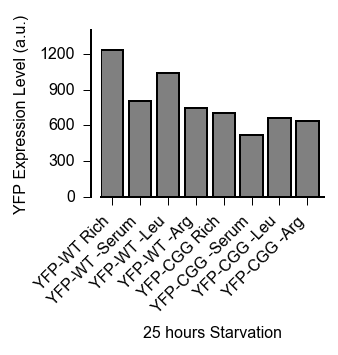

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([7,6,5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5,6,7])

ax.bar(xlocations, meanSubtractedData['mean'][sampleOrder], align='edge', color='grey' )
ax.errorbar(xlocations+0.4, meanSubtractedData['mean'][sampleOrder], meanSubtractedData['sterr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_notnormalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_notnormalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

####  YFP mean expression after 24h Starvation, -tmp mean subtracted, normalized to rich condition mean within cell lines ####

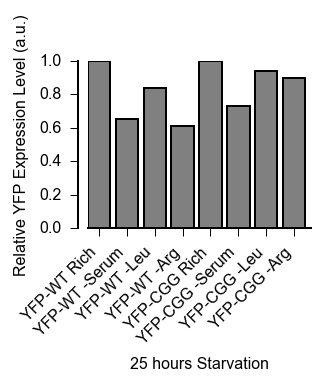

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([7,6,5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5,6,7])

ax.bar(xlocations, meanSubtractedData['normalizedMean'][sampleOrder], align='edge', color = 'grey' )
ax.errorbar(xlocations+0.4, meanSubtractedData['normalizedMean'][sampleOrder], meanSubtractedData['normalizedStdErr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(meanSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative YFP Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_normalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/yfpmean_25h_minustmpsubtracted_normalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

####  YFP median expression after 24h Starvation, -tmp mean subtracted, normalized to rich condition mean within cell lines ####

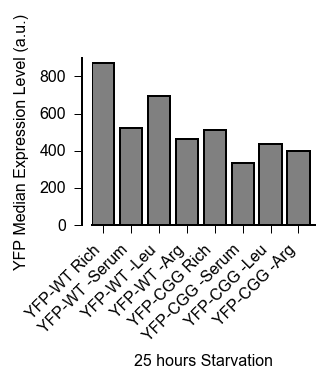

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([7,6,5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5,6,7])

ax.bar(xlocations, medianSubtractedData['mean'][sampleOrder], align='edge', color='grey' )
ax.errorbar(xlocations+0.4, medianSubtractedData['mean'][sampleOrder], medianSubtractedData['sterr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(medianSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'YFP Median Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.svg')
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_notnormalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

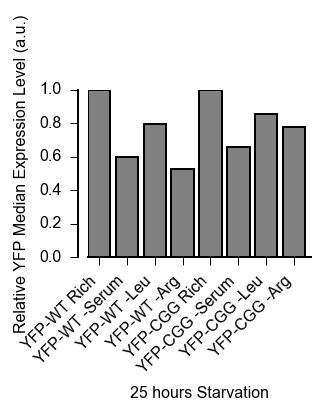

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
matplotlib.rcParams['savefig.dpi'] = 144

sampleOrder = numpy.array([7,6,5,4,3,2,1,0])

xlocations = numpy.array([0,1,2,3,4,5,6,7])

ax.bar(xlocations, medianSubtractedData['normalizedMean'][sampleOrder], align='edge', color = 'grey' )
ax.errorbar(xlocations+0.4, medianSubtractedData['normalizedMean'][sampleOrder], medianSubtractedData['normalizedStdErr'][sampleOrder], linestyle = 'None', color = 'black' )

spineOffset = {'left': 5, 'bottom': 0}    
[ spine.set_position(('outward',spineOffset[loc])) if loc in ['left','bottom'] 
     else spine.set_color('none') for loc, spine in ax.spines.items() ]         
ax.xaxis.set( ticks_position = 'bottom')
ax.yaxis.set( ticks_position = 'left')
ax.yaxis.set( major_locator = MaxNLocator(5) )

ax.set_xlabel('25 hours Starvation')
ax.set_xticks(xlocations+0.4)
ax.set_xticklabels(medianSubtractedData.index[sampleOrder], rotation=45, ha='right')

ax.set_ylabel( 'Relative YFP Median Expression Level (a.u.)')

fig.set_size_inches([0.25*len(xlocations),1.5])
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_normalizedtorich.svg')
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_normalizedtorich.png',bbox_inches='tight')
fig.savefig('../figures/yfpmedian_25h_minustmpsubtracted_normalizedtorich.pdf',bbox_inches='tight',pad_inches=0.1)

## Analysis v2 :  examining histograms & scatterplots of log-transformed data with FLowCytometryTools to determine gating  ##

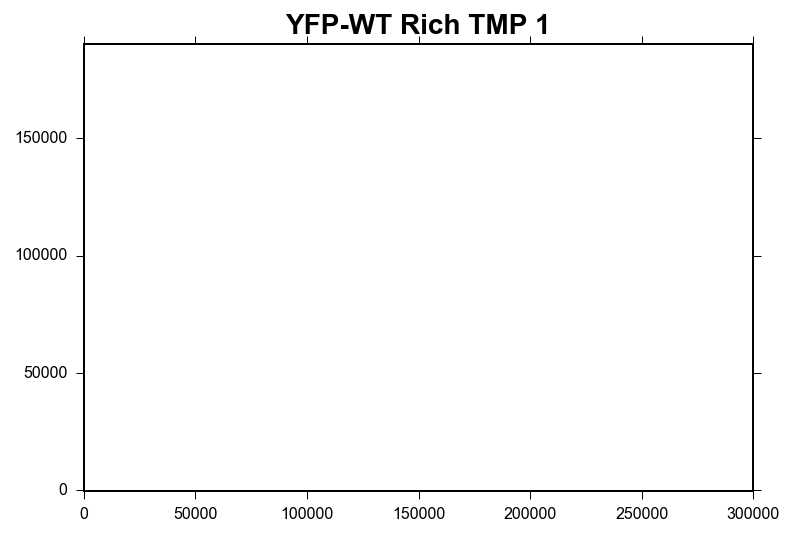

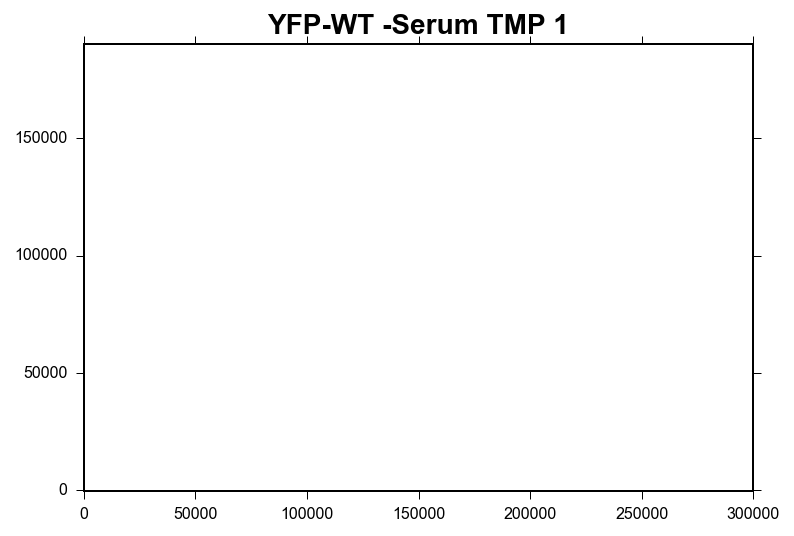

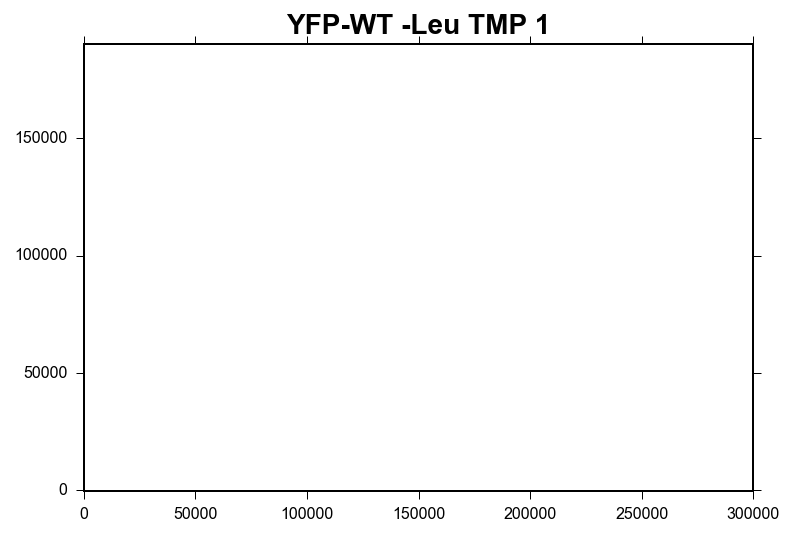

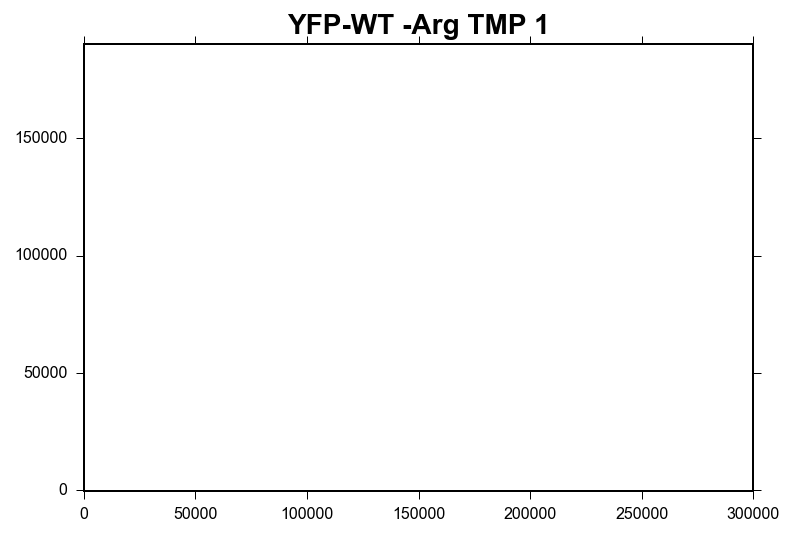

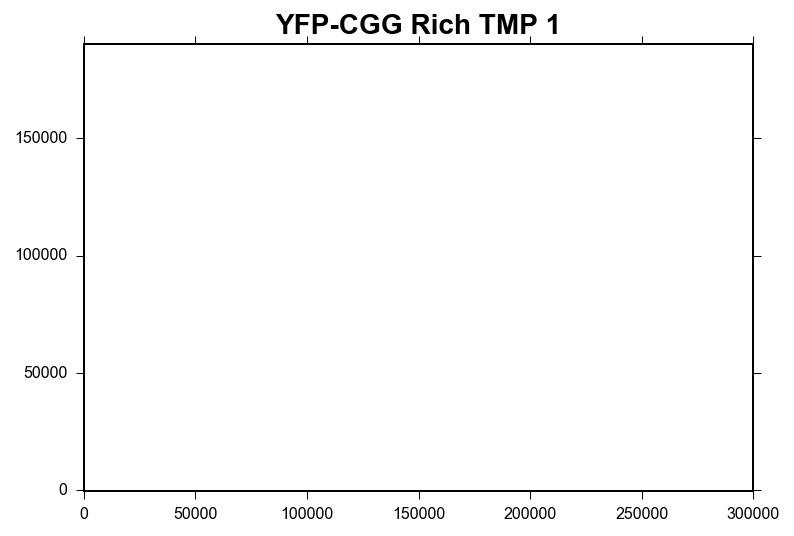

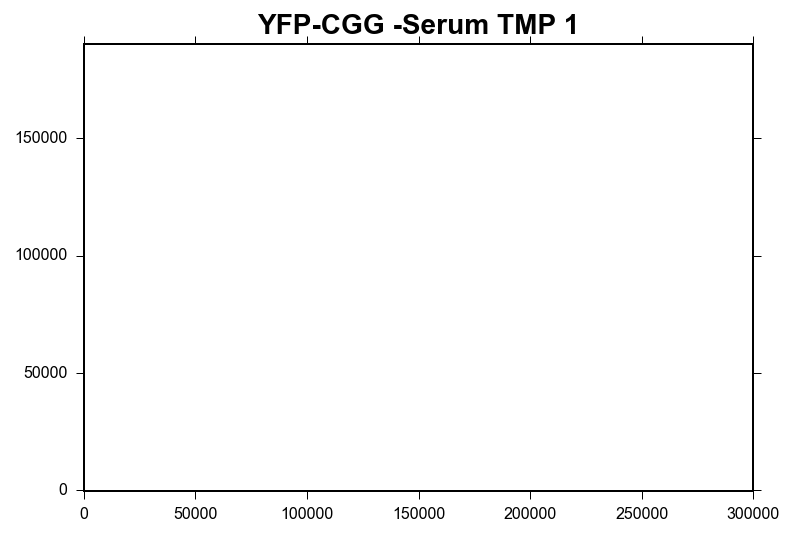

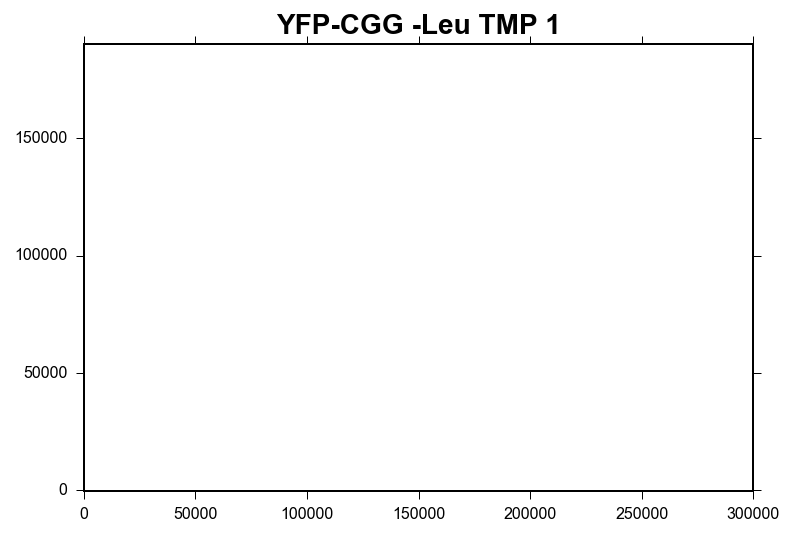

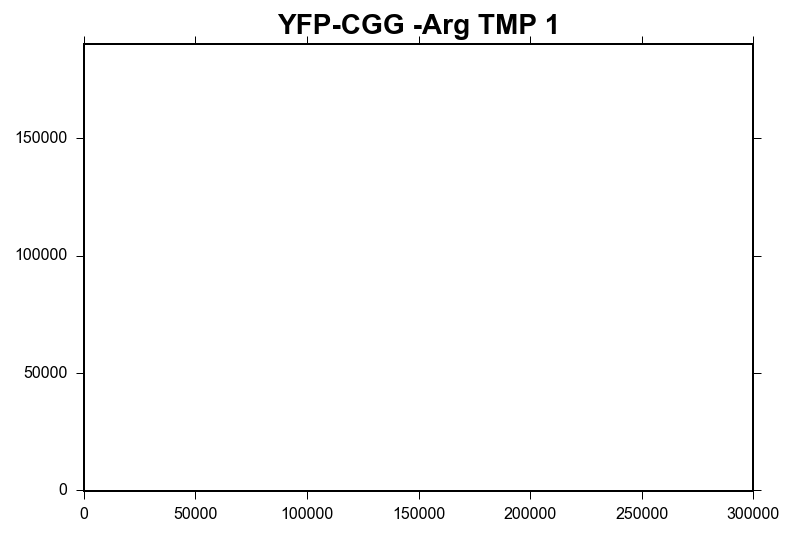

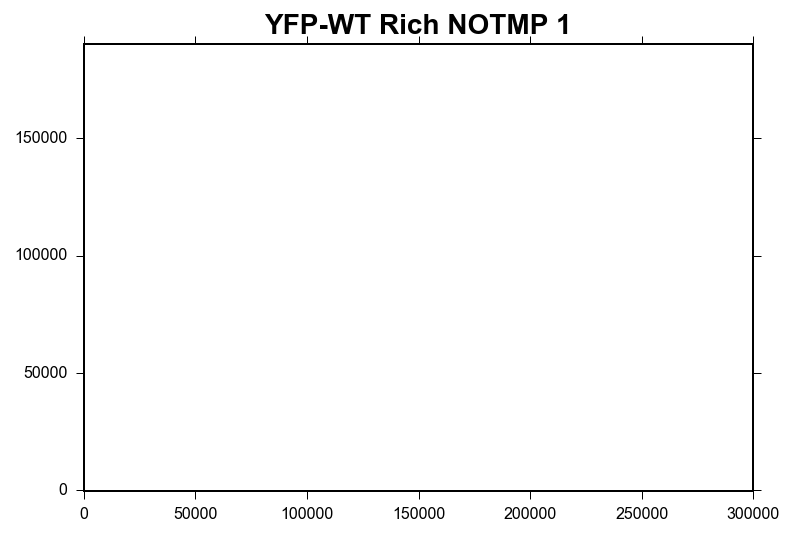

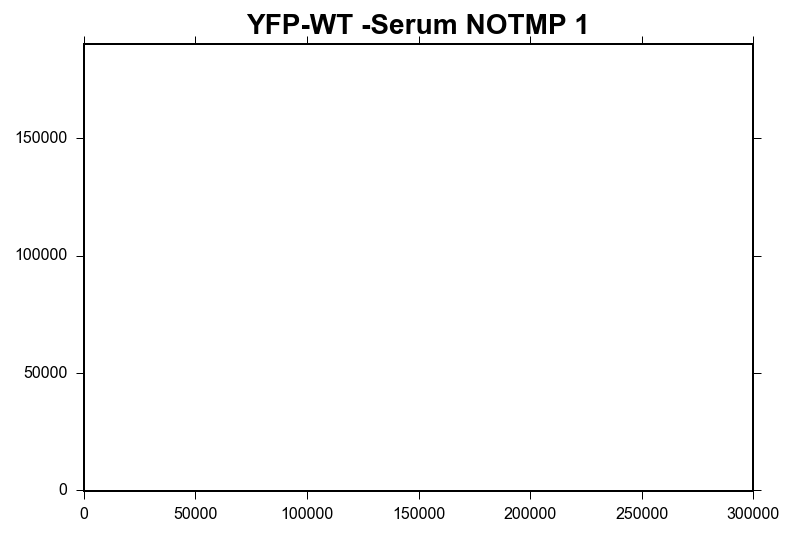

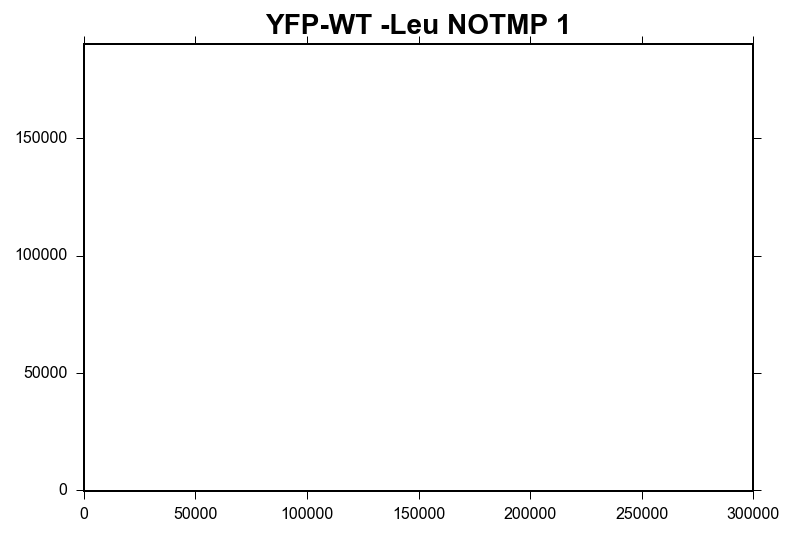

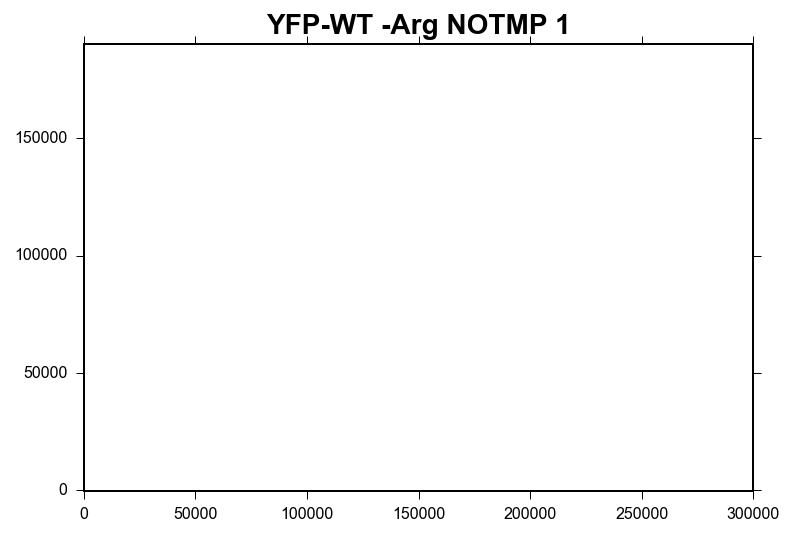

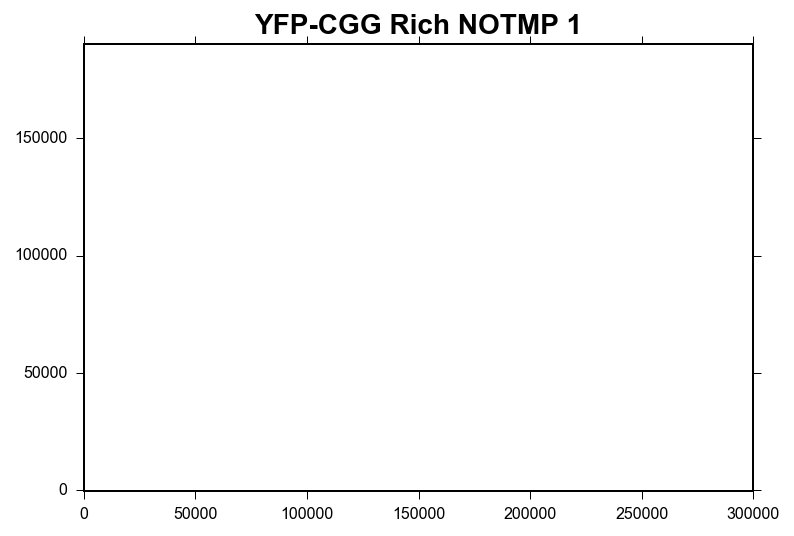

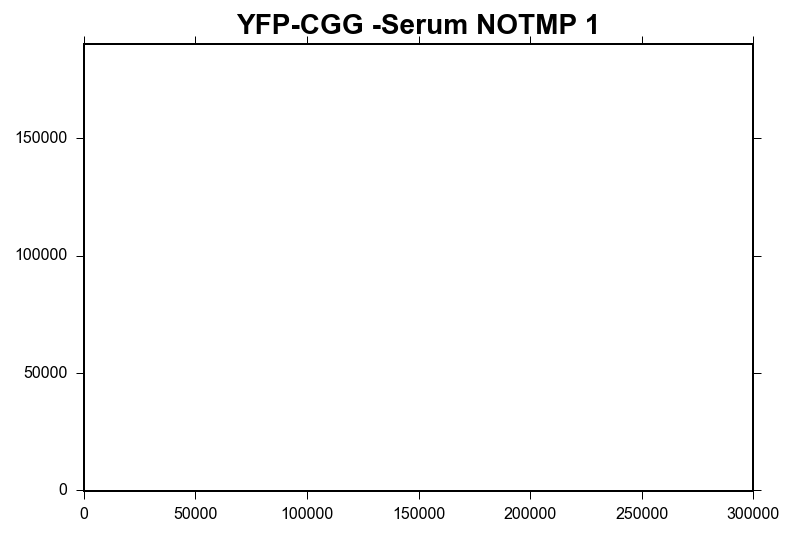

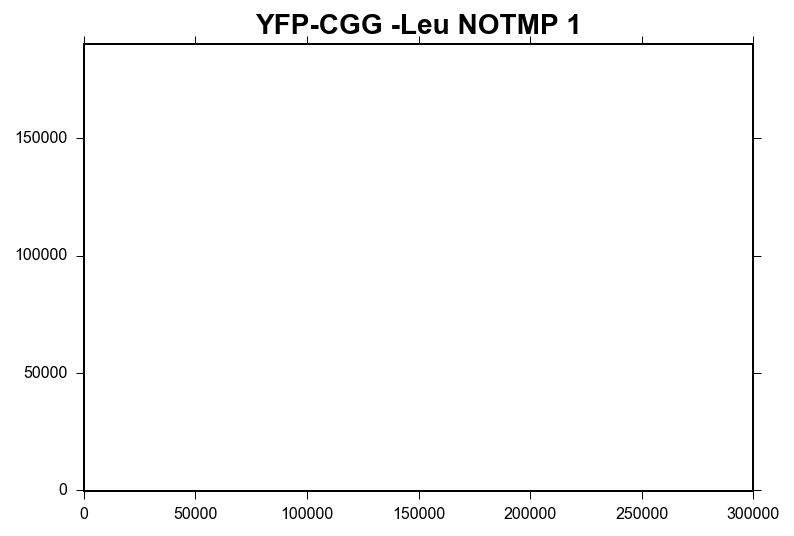

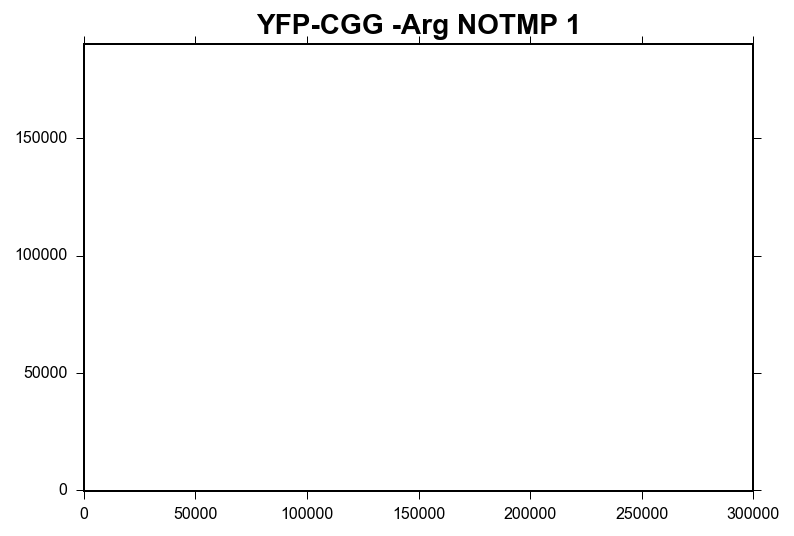

In [25]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../fcs_files/Specimen_003*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent 
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    #plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    fsc_gate = ThresholdGate(25000.0, 'FSC-A', region='above')
    ssc_gate = ThresholdGate(12500.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=200)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-100,190000)
    ax.set_xlim(-100,300000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    #tsample.plot('FITC-A', color='green', bins=100) #plots a 1D histogram of FITC
    #tsample.plot(['SSC-A', 'FSC-A'], kind='scatter', color='orangered', gates=[ssc_gate, fsc_gate], s=0.75, alpha = 0.95) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0